<a href="https://colab.research.google.com/github/inayan60/PersonalPortifolio/blob/main/Gastos_Joinville_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://transparencia.joinville.sc.gov.br/epublica-portal/rest/joinville/api/v1/despesaOrcamentaria"

In [4]:
unidades = [
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
    11, 12, 13, 15, 17, 18, 20, 21,
    22, 23, 24, 27, 28, 29, 30
]

In [5]:
dfs = []

for cod in unidades:
    params = {
        "periodo_inicial": "01/2025",
        "periodo_final": "08/2025",
        "codigo_unidade": cod
    }
    r = requests.get(url, params=params)
    data = r.json()

    if "registros" in data:
        registros = [r["registro"] for r in data["registros"]]
        df_temp = pd.json_normalize(registros)
        df_temp["codigo_unidade"] = cod
        dfs.append(df_temp)

df_final = pd.concat(dfs, ignore_index=True)

In [6]:
df_final.head()

,listMovimentos,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,despesa.programa.codigo,despesa.programa.denominacao,despesa.acao.codigo,despesa.acao.denominacao,...,fonteRecurso.denominacao,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,naturezaDespesa,codigo_unidade
0,"[{'dataMovimento': '2025-05-28', 'tipoMoviment...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,...,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,NaN,0
1,"[{'dataMovimento': '2025-07-08', 'tipoMoviment...",0.82001.15.127.6.3373.0.33903965,15.0,Urbanismo,127.0,Ordenamento Territorial,6.0,Joinville Promissora,3373.0,Gestão de Políticas de Planejamento Urbano - S...,...,Recursos Ordinários,2025.0,82001.0,Secretaria de Pesquisa e Planejamento Urbano -...,0.0,Prefeitura Municipal de Joinville - PMJ,82000.0,Secretaria de Pesquisa e Planejamento Urbano -...,NaN,0
2,"[{'dataMovimento': '2025-08-04', 'tipoMoviment...",0.5001.4.123.3.3164.0.33903645,4.0,Administração,123.0,Administração Financeira,3.0,Joinville Simples,3164.0,Processos administrativos - SEFAZ,...,Recursos Ordinários,2025.0,5001.0,Secretaria da Fazenda - SEFAZ,0.0,Prefeitura Municipal de Joinville - PMJ,5000.0,Secretaria da Fazenda - SEFAZ,NaN,0
3,"[{'dataMovimento': '2025-08-20', 'tipoMoviment...",0.5001.4.123.3.3164.0.33903981,4.0,Administração,123.0,Administração Financeira,3.0,Joinville Simples,3164.0,Processos administrativos - SEFAZ,...,Recursos Ordinários,2025.0,5001.0,Secretaria da Fazenda - SEFAZ,0.0,Prefeitura Municipal de Joinville - PMJ,5000.0,Secretaria da Fazenda - SEFAZ,NaN,0
4,"[{'dataMovimento': '2025-05-28', 'tipoMoviment...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,4.0,Joinville Capaz,3387.0,Transporte escolar - SED,...,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,NaN,0


In [7]:
df_final.shape

(43406, 33)

In [8]:
df_final.isnull().sum()

,0
listMovimentos,0
classificacaoCompleta.classificacaoCompleta,0
despesa.funcao.codigo,0
despesa.funcao.denominacao,0
despesa.subfuncao.codigo,0
despesa.subfuncao.denominacao,0
despesa.programa.codigo,21
despesa.programa.denominacao,21
despesa.acao.codigo,21
despesa.acao.denominacao,21


In [12]:
not_null_columns = df_final.columns[df_final.notnull().all()]
df_limpa = df_final[not_null_columns]
df_limpa.shape

(43406, 16)

In [14]:
df_exploded = df_limpa.explode('listMovimentos')
df_exploded = df_exploded.reset_index(drop=True)
df_exploded.head()

,listMovimentos,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,fonteRecurso.codigo,fonteRecurso.denominacao,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,codigo_unidade
0,"{'dataMovimento': '2025-05-28', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0
1,"{'dataMovimento': '2025-06-11', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0
2,"{'dataMovimento': '2025-06-18', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0
3,"{'dataMovimento': '2025-06-26', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0
4,"{'dataMovimento': '2025-07-08', 'tipoMovimento...",0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0


In [15]:
df_movimentos = pd.json_normalize(df_exploded['listMovimentos'])
df_movimentos.head()

,dataMovimento,tipoMovimento,valorMovimento
0,2025-05-28,Emissão de empenho,24505.0
1,2025-06-11,Empenho em liquidação,19227.0
2,2025-06-18,Liquidação de empenho,19227.0
3,2025-06-26,Anulação de empenho,5278.0
4,2025-07-08,Pagamento de empenho,19227.0


In [18]:
df_processada = pd.concat([df_exploded.drop(columns=['listMovimentos']), df_movimentos], axis=1)
df_processada['dataMovimento'] = pd.to_datetime(df_processada['dataMovimento'])
df_processada["valorMovimento"] = pd.to_numeric(df_processada["valorMovimento"], errors='coerce')
df_processada.head()


,classificacaoCompleta.classificacaoCompleta,despesa.funcao.codigo,despesa.funcao.denominacao,despesa.subfuncao.codigo,despesa.subfuncao.denominacao,fonteRecurso.codigo,fonteRecurso.denominacao,exercicio.exercicio,unidadeOrcamentaria.codigo,unidadeOrcamentaria.denominacao,unidadeOrcamentaria.unidadeGestora.codigo,unidadeOrcamentaria.unidadeGestora.denominacao,unidadeOrcamentaria.unidadeOrcamentariaPai.codigo,unidadeOrcamentaria.unidadeOrcamentariaPai.denominacao,codigo_unidade,dataMovimento,tipoMovimento,valorMovimento
0,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-05-28,Emissão de empenho,24505.0
1,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-06-11,Empenho em liquidação,19227.0
2,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-06-18,Liquidação de empenho,19227.0
3,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-06-26,Anulação de empenho,5278.0
4,0.6001.12.782.4.3387.0.33903932,12.0,Educação,782.0,Transporte Rodoviário,119.0,Transferências do FUNDEB - (aplicação em outra...,2025.0,6001.0,Secretaria de Educação - SED,0.0,Prefeitura Municipal de Joinville - PMJ,6000.0,Secretaria de Educação - SED,0,2025-07-08,Pagamento de empenho,19227.0


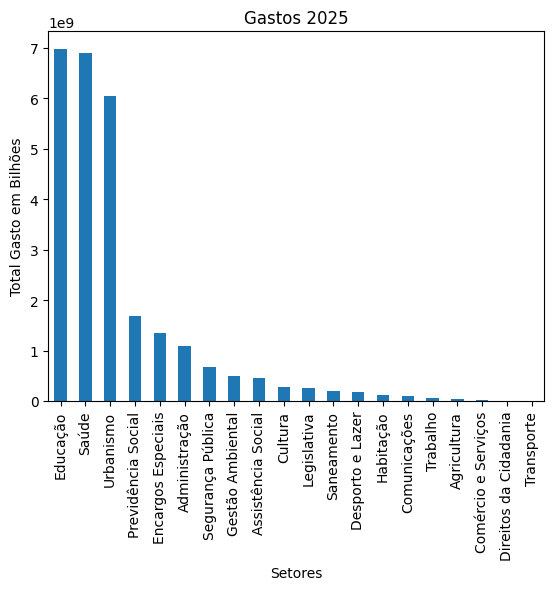

In [21]:
gastos_jlle = df_processada.groupby("despesa.funcao.denominacao")["valorMovimento"].sum().sort_values(ascending=False)

gastos_jlle.plot(kind="bar")
plt.ylabel("Total Gasto em Bilhões")
plt.xlabel("Setores")
plt.title("Gastos 2025")
plt.show()